<a href="https://colab.research.google.com/github/OctavioSantalucia/econometria/blob/main/econometria%20/ejercicios/C1_Cap%C3%ADtulo_3_Resuelto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

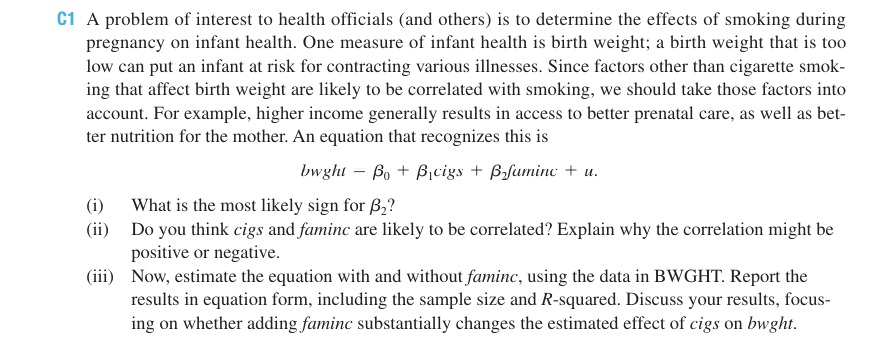

i) B2 mide el efecto del ingreso familiar al peso de nacimiento. El sentido común nos permite pensar que a mayor ingreso familiar, mejor nutrición y mejores cuidados, por ende mayor peso al nacer. Es decir, que la relación es positiva. Por ende, B2 probablemente será positivo.

ii) Ciertamente estarán correlacionados. El signo sin embargo no me parece evidente.
Por ejemplo, podría uno pensar que el consumo de cigarrillos será mayor en ingresos menores, por falta de educación. Eso indicaría correlación negativa.
Sin embargo, también podría uno arguir que mayor ingreso significa mayor poder adquisitivo, para poder comprar más cigarrillos, lo cual podría indicar correlación positiva. O, si tomamos ambas hipótesis, un efecto no lineal.

In [ ]:
#iii)
import pandas as pd
import statsmodels.api as sm



In [ ]:
df = pd.read_csv('https://github.com/OctavioSantalucia/econometria/blob/main/datos/datasets_wooldridge/bwght.csv?raw=True', delimiter=';', quoting=0, encoding='utf-8',header=None)

In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,13.5,16.5,122.3,109,12,12,1,1,1,0,4.691348,6.8125,0.0,2.602690
1,7.5,16.5,122.3,133,6,12,2,1,0,0,4.890349,8.3125,0.0,2.014903
2,0.5,16.5,122.3,129,.,12,2,0,0,0,4.859812,8.0625,0.0,-0.693147
3,15.5,16.5,122.3,126,12,12,2,1,0,0,4.836282,7.8750,0.0,2.740840
4,27.5,16.5,122.3,134,14,12,2,1,1,0,4.897840,8.3750,0.0,3.314186


In [ ]:
#añado encabezados
# Define column names
encabezados = ['faminc', 'cigtax','cigprice', 'bwght','fatheduc','motheduc','parity','male','white','cigs','lbwght','bwghtlbs','packs','lmaninc']  # Add all column names here

# Assign column names to the DataFrame
df.columns = encabezados

In [ ]:
df.head()

,faminc,cigtax,cigprice,bwght,fatheduc,motheduc,parity,male,white,cigs,lbwght,bwghtlbs,packs,lmaninc
0,13.5,16.5,122.3,109,12,12,1,1,1,0,4.691348,6.8125,0.0,2.602690
1,7.5,16.5,122.3,133,6,12,2,1,0,0,4.890349,8.3125,0.0,2.014903
2,0.5,16.5,122.3,129,.,12,2,0,0,0,4.859812,8.0625,0.0,-0.693147
3,15.5,16.5,122.3,126,12,12,2,1,0,0,4.836282,7.8750,0.0,2.740840
4,27.5,16.5,122.3,134,14,12,2,1,1,0,4.897840,8.3750,0.0,3.314186


<Axes: >

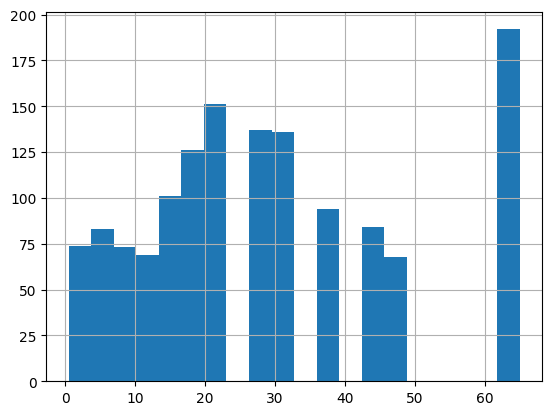

In [ ]:
df["faminc"].hist(bins=20)

In [ ]:
df["faminc"].describe()

count    1388.000000
mean       29.026657
std        18.739285
min         0.500000
25%        14.500000
50%        27.500000
75%        37.500000
max        65.000000
Name: faminc, dtype: float64

<Axes: >

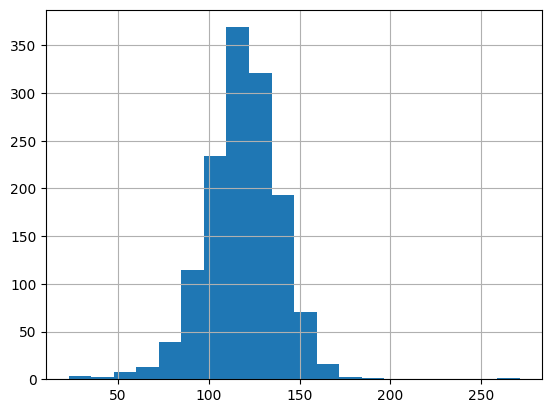

In [ ]:
df["bwght"].hist(bins=20)

In [ ]:
df["bwght"].describe()

count    1388.000000
mean      118.699568
std        20.353964
min        23.000000
25%       107.000000
50%       120.000000
75%       132.000000
max       271.000000
Name: bwght, dtype: float64

<Axes: >

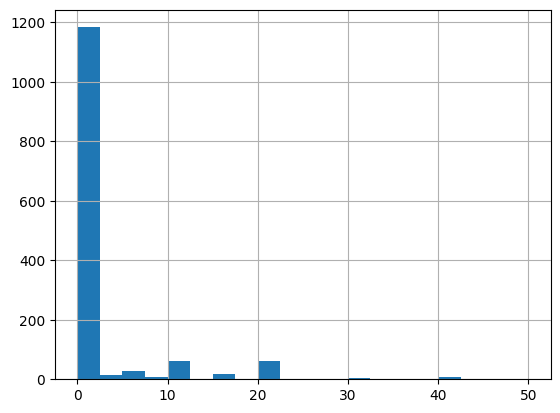

In [ ]:
df["cigs"].hist(bins=20)

Ciertamente cigs muestra valores extremos. ¿50 cigarillos diarios durante un embarazo?

In [ ]:
df["cigs"].describe()

count    1388.000000
mean        2.087176
std         5.972688
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        50.000000
Name: cigs, dtype: float64

In [ ]:
def regress(lista, data):
  """
  Funcion que realiza la regresion OLS
  La primera variable de la lista es la dependiente, el resto son las explicativas
  data es la base de datos
  """
  datos=data[lista]
  # el metodo dropna() me permite eliminar las filas que tienen algun valor missing
  datos=datos.dropna()
  Y=datos[lista[0]]
  X=datos[lista[1:]]
  X=sm.add_constant(X)
  modelo=sm.OLS(Y,X)
  resultados=modelo.fit()
  print(resultados.summary())
  return resultados

In [ ]:
regress(['bwght','cigs'], df)

                            OLS Regression Results                            
Dep. Variable:                  bwght   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     32.24
Date:                Mon, 15 Apr 2024   Prob (F-statistic):           1.66e-08
Time:                        13:40:14   Log-Likelihood:                -6135.5
No. Observations:                1388   AIC:                         1.227e+04
Df Residuals:                    1386   BIC:                         1.229e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        119.7719      0.572    209.267      0.0

bwght = 119 - 0.51 cigs

In [ ]:
regress(['bwght','cigs','faminc'], df)

                            OLS Regression Results                            
Dep. Variable:                  bwght   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     21.27
Date:                Mon, 15 Apr 2024   Prob (F-statistic):           7.94e-10
Time:                        13:40:45   Log-Likelihood:                -6130.4
No. Observations:                1388   AIC:                         1.227e+04
Df Residuals:                    1385   BIC:                         1.228e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        116.9741      1.049    111.512      0.0

bwght = 116 - 0.46 cigs + 0.09 faminc

La inclusión de faminc en la regresión afecta a cigs, pero el cambio no era tan grande como podía originalmente esperarase. La magnitud del estimador varía poco, y la signficancia estadística del estimador tampoco se ve afectada. Pero sí se observa una mejora en el R2.